In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/occupancy/'

/home/koendej/apps/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
occupancy_all = pd.read_csv(f'{PATH}occupancy_all.csv', low_memory=False)

In [4]:
from IPython.display import HTML, display

In [5]:
display(occupancy_all.head())

,country,pms,parkingFacilityId,parkingFacilityZoneId,articleId,time,timeInMillis,occupancy
0,NL,Skidata,505677,0,9999,2018-02-26 20:30:00,1519677000000,0
1,NL,Skidata,505677,0,9999,2018-02-26 20:15:00,1519676100000,0
2,NL,Skidata,505677,0,9999,2018-02-26 20:00:00,1519675200000,0
3,NL,Skidata,505677,0,9999,2018-02-26 19:45:00,1519674300000,0
4,NL,Skidata,505677,0,9999,2018-02-26 19:30:00,1519673400000,0


In [6]:
display(DataFrameSummary(occupancy_all).summary())

,country,pms,parkingFacilityId,parkingFacilityZoneId,articleId,time,timeInMillis,occupancy
count,NaN,NaN,2.56317e+07,NaN,2.56317e+07,NaN,2.56317e+07,2.56317e+07
mean,NaN,NaN,287171,NaN,4.08373e+07,NaN,1.52639e+12,20.4759
std,NaN,NaN,246828,NaN,1.12477e+08,NaN,4.5643e+09,135.502
min,NaN,NaN,1,NaN,1,NaN,1.51848e+12,0
25%,NaN,NaN,7056,NaN,306,NaN,1.52243e+12,0
50%,NaN,NaN,500819,NaN,584,NaN,1.52639e+12,0
75%,NaN,NaN,502872,NaN,9999,NaN,1.53034e+12,3
max,NaN,NaN,510842,NaN,5.4e+08,NaN,1.53429e+12,3388
counts,25631712,25631712,25631712,25631712,25631712,25631712,25631712,25631712
uniques,1,3,176,66,324,17568,17568,3356


In [26]:
sorted = occupancy_all.drop(columns=["country", "pms"]).sort_values(by=["parkingFacilityId", "parkingFacilityZoneId", "articleId", "timeInMillis"])

add_datepart(sorted, "time", drop=False)


In [27]:
display(sorted.head())

,parkingFacilityId,parkingFacilityZoneId,articleId,time,timeInMillis,occupancy,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
5206043,1,unknown section,10000005,2018-02-13 00:15:00,1518480900000,0,2018,2,7,13,1,44,False,False,False,False,False,False,1518480900
5206042,1,unknown section,10000005,2018-02-13 00:30:00,1518481800000,0,2018,2,7,13,1,44,False,False,False,False,False,False,1518481800
5206041,1,unknown section,10000005,2018-02-13 00:45:00,1518482700000,0,2018,2,7,13,1,44,False,False,False,False,False,False,1518482700
5206040,1,unknown section,10000005,2018-02-13 01:00:00,1518483600000,0,2018,2,7,13,1,44,False,False,False,False,False,False,1518483600
5206039,1,unknown section,10000005,2018-02-13 01:15:00,1518484500000,0,2018,2,7,13,1,44,False,False,False,False,False,False,1518484500


In [28]:
display(sorted.tail())

,parkingFacilityId,parkingFacilityZoneId,articleId,time,timeInMillis,occupancy,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,timeElapsed
4535738,510842,0,9999,2018-08-14 23:00:00,1534287600000,1,2018,8,33,14,1,226,False,False,False,False,False,False,1534287600
4535737,510842,0,9999,2018-08-14 23:15:00,1534288500000,0,2018,8,33,14,1,226,False,False,False,False,False,False,1534288500
4535736,510842,0,9999,2018-08-14 23:30:00,1534289400000,0,2018,8,33,14,1,226,False,False,False,False,False,False,1534289400
4535735,510842,0,9999,2018-08-14 23:45:00,1534290300000,0,2018,8,33,14,1,226,False,False,False,False,False,False,1534290300
4535734,510842,0,9999,2018-08-15 00:00:00,1534291200000,0,2018,8,33,15,2,227,False,False,False,False,False,False,1534291200


In [29]:
from datetime import date
numdays = (date(2018, 8, 14) - date(2018, 2, 13)).days

In [36]:
sorted.columns

Index(['parkingFacilityId', 'parkingFacilityZoneId', 'articleId', 'time',
       'timeInMillis', 'occupancy', 'timeYear', 'timeMonth', 'timeWeek',
       'timeDay', 'timeDayofweek', 'timeDayofyear', 'timeIs_month_end',
       'timeIs_month_start', 'timeIs_quarter_end', 'timeIs_quarter_start',
       'timeIs_year_end', 'timeIs_year_start', 'timeElapsed'],
      dtype='object')

In [35]:
cat_vars = ['parkingFacilityId', 'parkingFacilityZoneId', 'articleId', 
       'timeYear', 'timeMonth', 'timeWeek',
       'timeDay', 'timeDayofweek', 'timeDayofyear', 'timeIs_month_end',
       'timeIs_month_start', 'timeIs_quarter_end', 'timeIs_quarter_start',
       'timeIs_year_end', 'timeIs_year_start']

In [37]:
contin_vars = []

In [38]:
dep = 'occupancy'
sorted = sorted[cat_vars+contin_vars+[dep, 'time']].copy()

In [39]:
for v in cat_vars: sorted[v] = sorted[v].astype('category').cat.as_ordered()

In [41]:
sorted.head()

,parkingFacilityId,parkingFacilityZoneId,articleId,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,occupancy,time
5206043,1,unknown section,10000005,2018,2,7,13,1,44,False,False,False,False,False,False,0,2018-02-13 00:15:00
5206042,1,unknown section,10000005,2018,2,7,13,1,44,False,False,False,False,False,False,0,2018-02-13 00:30:00
5206041,1,unknown section,10000005,2018,2,7,13,1,44,False,False,False,False,False,False,0,2018-02-13 00:45:00
5206040,1,unknown section,10000005,2018,2,7,13,1,44,False,False,False,False,False,False,0,2018-02-13 01:00:00
5206039,1,unknown section,10000005,2018,2,7,13,1,44,False,False,False,False,False,False,0,2018-02-13 01:15:00


In [56]:
sorted_samp = sorted.set_index("time")

In [57]:
sorted_samp.head()

,parkingFacilityId,parkingFacilityZoneId,articleId,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start,occupancy
time,,,,,,,,,,,,,,,,
2018-02-13 00:15:00,1,unknown section,10000005,2018,2,7,13,1,44,False,False,False,False,False,False,0
2018-02-13 00:30:00,1,unknown section,10000005,2018,2,7,13,1,44,False,False,False,False,False,False,0
2018-02-13 00:45:00,1,unknown section,10000005,2018,2,7,13,1,44,False,False,False,False,False,False,0
2018-02-13 01:00:00,1,unknown section,10000005,2018,2,7,13,1,44,False,False,False,False,False,False,0
2018-02-13 01:15:00,1,unknown section,10000005,2018,2,7,13,1,44,False,False,False,False,False,False,0


In [130]:
# sorted_samp.reset_index(inplace=True)

sorted_samp = sorted_samp.loc[sorted_samp['occupancy'] > 0]


sorted_samp = sorted_samp.iloc[:2048]


In [131]:
df, y, nas = proc_df(sorted_samp, 'occupancy', do_scale=False)

In [132]:
df

,parkingFacilityId,parkingFacilityZoneId,articleId,timeYear,timeMonth,timeWeek,timeDay,timeDayofweek,timeDayofyear,timeIs_month_end,timeIs_month_start,timeIs_quarter_end,timeIs_quarter_start,timeIs_year_end,timeIs_year_start
time,,,,,,,,,,,,,,,
2018-06-11 06:00:00,1,66,84,1,5,18,11,1,119,1,1,1,1,1,1
2018-06-11 06:15:00,1,66,84,1,5,18,11,1,119,1,1,1,1,1,1
2018-06-11 06:30:00,1,66,84,1,5,18,11,1,119,1,1,1,1,1,1
2018-06-11 06:45:00,1,66,84,1,5,18,11,1,119,1,1,1,1,1,1
2018-06-11 07:00:00,1,66,84,1,5,18,11,1,119,1,1,1,1,1,1
2018-06-11 07:15:00,1,66,84,1,5,18,11,1,119,1,1,1,1,1,1
2018-06-11 07:30:00,1,66,84,1,5,18,11,1,119,1,1,1,1,1,1
2018-06-11 07:45:00,1,66,84,1,5,18,11,1,119,1,1,1,1,1,1
2018-06-11 08:00:00,1,66,84,1,5,18,11,1,119,1,1,1,1,1,1


In [133]:
yl = np.log(y)

In [134]:
yl

array([0.     , 0.     , 0.69315, 1.09861, 1.38629, 1.79176, 1.94591, 2.30259, 2.77259, 2.83321, 3.04452,
       3.2581 , 3.3673 , 3.55535, 3.61092, 3.63759, 3.71357, 3.73767, 3.7612 , 3.73767, ..., 0.69315,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.69315, 0.69315, 1.38629, 1.60944,
       1.94591, 1.79176, 1.94591, 2.19722, 2.56495, 2.77259, 2.94444, 2.94444])

In [135]:
train_ratio = 0.75
n = len(df)
samp_size = n
n

256

In [136]:
train_size = int(samp_size * train_ratio);
val_idx = list(range(train_size, len(df)))

In [139]:
train_size

192

In [140]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, yl.astype(np.float32), cat_flds=cat_vars, bs=128)

In [141]:
cat_sz = [(c, len(sorted_samp[c].cat.categories)+1) for c in cat_vars]

In [142]:
cat_sz

[('parkingFacilityId', 177),
 ('parkingFacilityZoneId', 67),
 ('articleId', 325),
 ('timeYear', 2),
 ('timeMonth', 8),
 ('timeWeek', 28),
 ('timeDay', 32),
 ('timeDayofweek', 8),
 ('timeDayofyear', 185),
 ('timeIs_month_end', 3),
 ('timeIs_month_start', 3),
 ('timeIs_quarter_end', 3),
 ('timeIs_quarter_start', 3),
 ('timeIs_year_end', 2),
 ('timeIs_year_start', 2)]

In [143]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

In [144]:
emb_szs

[(177, 50),
 (67, 34),
 (325, 50),
 (2, 1),
 (8, 4),
 (28, 14),
 (32, 16),
 (8, 4),
 (185, 50),
 (3, 2),
 (3, 2),
 (3, 2),
 (3, 2),
 (2, 1),
 (2, 1)]

In [145]:
def inv_y(a): return np.exp(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pct_var = (targ - inv_y(y_pred))/targ
    return math.sqrt((pct_var**2).mean())

max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [146]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

In [147]:
lr = 1e-3
m.lr_find()

epoch      trn_loss   val_loss       
    0      1.854111   7.242373  


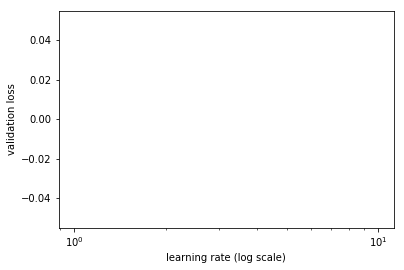

In [148]:
m.sched.plot(100)

In [159]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-6

In [160]:
m.fit(lr, 3, metrics=[exp_rmspe])

epoch      trn_loss   val_loss   exp_rmspe  
    0      1.677433   1.85796    3.279232  
    1      1.680346   1.857447   3.288413  
    2      1.69453    1.856952   3.297385  


[array([1.85695]), 3.2973847122913695]